# Newton-Raphson root-finding method

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def newton_raphson(f, df, x):
    tol = 1e-5
    # 
    error = 1
    iterations = 0
    x_vals = []
    y_vals = []
    while error > tol and iterations < 100:
        y = f(x)
        x_new = x - y/df(x)
        error = abs(x_new - x)
        iterations += 1
        x_vals.append(x)
        y_vals.append(y)
        x = x_new
    print(f'Toleration reached: {tol:.5f}')
    return (x_vals, y_vals)

In [17]:
f = lambda x: x**2 - 6*x + 3
df = lambda x: 2*x - 6
x = 4
x_actual = [i for i in np.linspace(-5, 5, 20)]
y_actual = [f(i) for i in x_actual]

Toleration reached: 0.00001


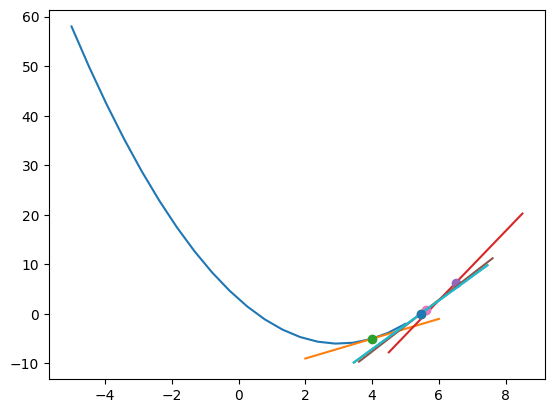

In [18]:
plt.plot(x_actual, y_actual)
x_predict, y_predict = newton_raphson(f, df, x)
slopes = [df(i) for i in x_predict]

for i in range(len(slopes)):
    m = slopes[i]
    y = lambda x: m*(x-x_predict[i]) + y_predict[i]
    test_x = [x_predict[i]-2, x_predict[i]+2]
    plt.plot(test_x, [y(test_x[0]), y(test_x[1])])
    plt.plot(x_predict[i], y_predict[i], marker = 'o')

In [19]:
print(f'Convergence: ({x_predict[-1]:.2f}, {y_predict[-1]:.2f})')

Convergence: (5.45, 0.00)


## Check for accuracy

In [20]:
print(f"estimated root: {x_predict[-1]}")

estimated root: 5.449494371606965


In [21]:
print(f'f({x_predict[-1]:2f}) = {f(x_predict[-1])}')

f(5.449494) = 2.2676534204180143e-05


#### We can see that this is almost equal to 0, meaning our estimate for the root is precise to the required accuracy.

## Trapezoidal Method of integration

#### Let's visualize how trapezoidal method for definite integral works

In [7]:
def trapezoidal_plot(f, a, b, n):
    # Calculate step size
    h = (b - a) / n

    # Generate x values for the function plot
    x = np.linspace(a, b, 500)
    y = f(x)

    # Plot the function
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='f(x)', color='blue', lw=2)

    # Plot the trapezoids
    x_trapezoids = np.linspace(a, b, n + 1)
    y_trapezoids = f(x_trapezoids)

    for i in range(n):
        # Create the vertices of the trapezoid
        x_coords = [x_trapezoids[i], x_trapezoids[i], x_trapezoids[i + 1], x_trapezoids[i + 1]]
        y_coords = [0, y_trapezoids[i], y_trapezoids[i + 1], 0]

        # Plot the trapezoid
        plt.fill(x_coords, y_coords, color='lightblue', edgecolor='blue', alpha=0.5)

    # Annotate the plot
    plt.title(f"Trapezoidal Rule Visualization (n={n})", fontsize=14)
    plt.xlabel("x", fontsize=12)
    plt.ylabel("f(x)", fontsize=12)
    plt.axhline(0, color='black',linewidth=0.5, linestyle='--')
    plt.legend()
    plt.grid(alpha=0.3)

    # Calculate the area under the curve using the trapezoidal rule
    total = (f(a) + f(b)) / 2
    x = a + h

    for i in range(n - 1):
        total += f(x)
        x += h

    area = total * h
    print(f"Estimated area under the curve: {area}")

Estimated area under the curve: 63.30375000000003


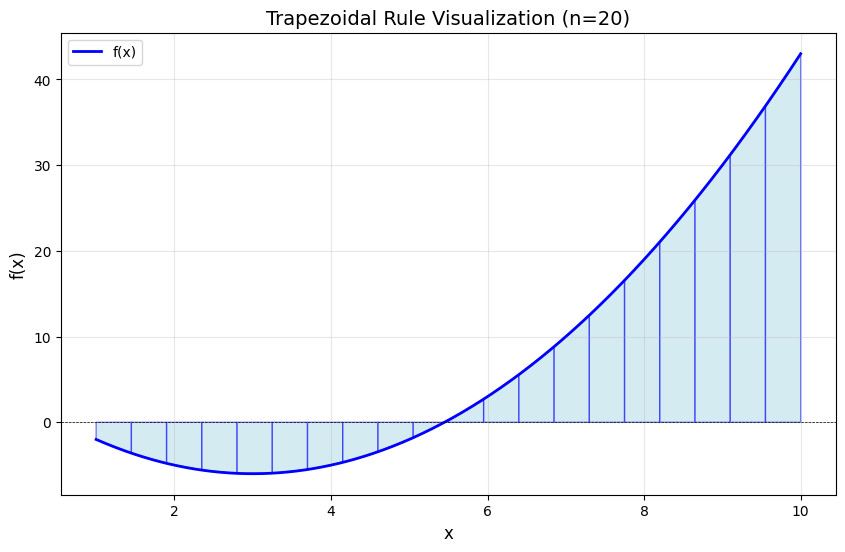

In [22]:
f = lambda x: x**2 - 6*x + 3
a = 1
b = 10
trapezoidal_plot(f, a, b, 20)